<a href="https://colab.research.google.com/github/Drkareemkamal/CRT-Intern/blob/main/Digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import liberaries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import pandas as pd


### load our dataset

In [2]:
(train_img,train_labels),(test_img,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### check image shape

In [3]:

train_img.shape , train_labels.shape

((60000, 28, 28), (60000,))

### check out random 25 images and theri labels

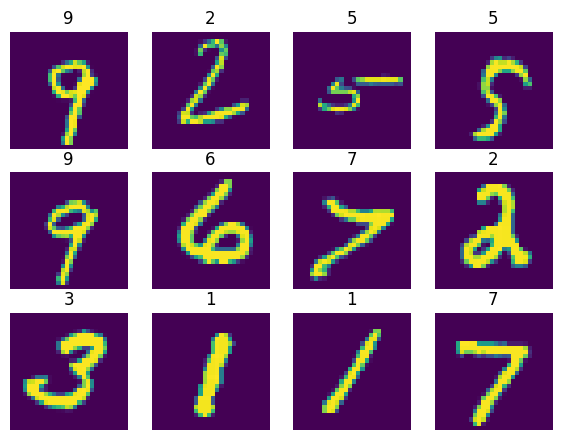

In [6]:
plt.figure(figsize=(7,7))

for i in range(12):
  ax= plt.subplot(4,4,i+1)
  random_img_index = random.choice(range(len(train_img)))
  plt.imshow(train_img[random_img_index])
  plt.title(train_labels[random_img_index])
  plt.axis(False)
  # plt.show();

In [8]:
train_img.min() , train_img.max()

(0, 255)

### check image shape

In [7]:
train_img_norm = train_img/255.
test_img_norm = test_img /255.

### use  `Sequential API` to train our model in `C.Neural Network`

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,input_shape=(28,28,1),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Dropout(0.2),# to prevent overfitting
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


history = model.fit(train_img_norm,
                    train_labels,
                    epochs=10,
                    validation_data = (test_img_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 20s 5ms/step - loss: 0.2870 - accuracy: 0.9093 - val_loss: 0.0634 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1013 - accuracy: 0.9682 - val_loss: 0.0544 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0761 - accuracy: 0.9750 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0664 - accuracy: 0.9790 - val_loss: 0.0333 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0585 - accuracy: 0.9810 - val_loss: 0.0294 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0528 - accuracy: 0.9828 - val_loss: 0.0278 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0266 - val_accurac

### Check our `loss curve` on training and validation data

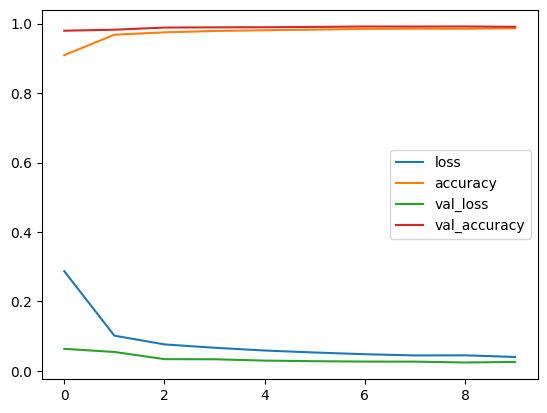

In [11]:
pd.DataFrame(history.history).plot();